# SWE2009-DATA MINING TECHNIQUES
# G1+TG1
# Project-HEART DISEASE PREDICTION

## Step1:Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step2-Read Dataset

In [2]:
df=pd.read_csv(r'C:\Users\B.RENUKA\Downloads\heart.csv') #df-Dataframe

In [3]:
df.head()  #First 5 Rows in dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


## Step3:Sanity check of data

In [5]:
# Returns a tuple representing its dimensions(row X column)
df_shape = df.shape
print(df_shape)

(1025, 14)


In [6]:
df.info()  #print a concise summary of a DataFrame, including its index dtype and column dtypes, non-null values, and memory usage. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1025 non-null   int64  
 1   sex            1025 non-null   int64  
 2   cp             1025 non-null   int64  
 3   trestbps       1025 non-null   int64  
 4   chol           1025 non-null   int64  
 5   fbs            1025 non-null   int64  
 6   restecg        1025 non-null   int64  
 7   thalach        1025 non-null   int64  
 8   exang          1025 non-null   int64  
 9   oldpeak        1025 non-null   float64
 10  slope          1025 non-null   int64  
 11  ca             1025 non-null   int64  
 12  thal           1025 non-null   int64  
 13  heart_disease  1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
#finding the missing values   Missing values present-1 ,No missing values-0
df.isnull().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
heart_disease    0
dtype: int64

In [8]:
#finding duplicates
df.duplicated().sum()

723

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

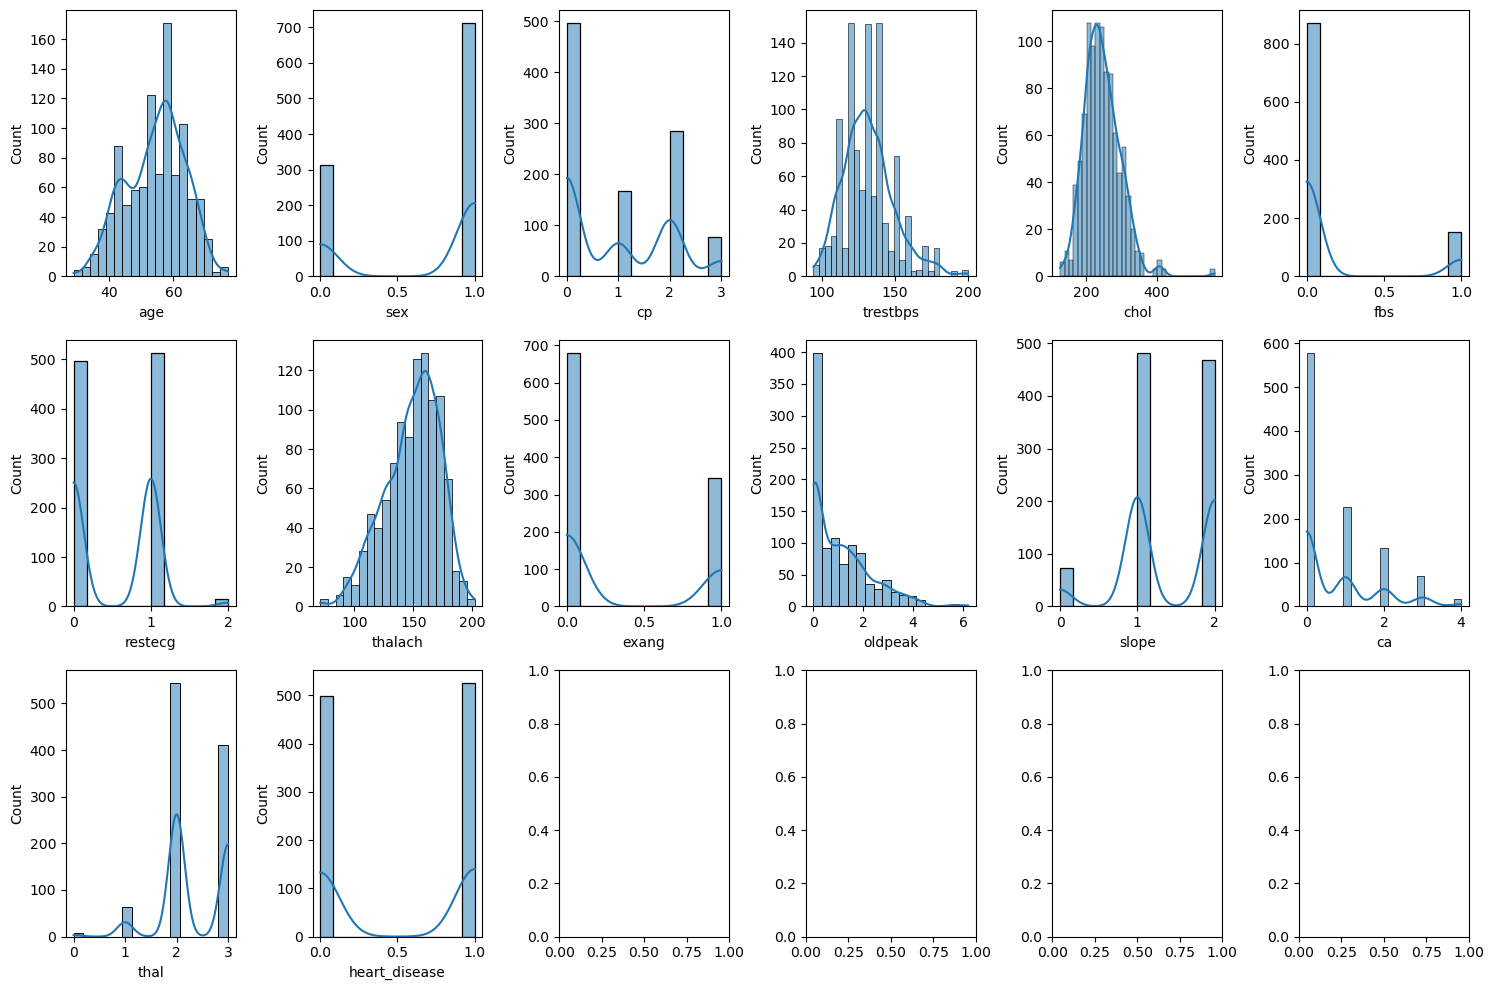

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def histplots(df):
    cols = df.select_dtypes(include=['int64', 'float64']).columns
    n = (len(cols) - 1) // 6 + 1
    m = min(len(cols), 6)
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15, 10))
    for idx, col in enumerate(cols):                                       #idx-index
        i = idx // m
        j = idx % m
        sns.histplot(data=df, x=col, ax=axes[i][j], kde=True)

    plt.tight_layout()
    plt.show()

histplots(df)


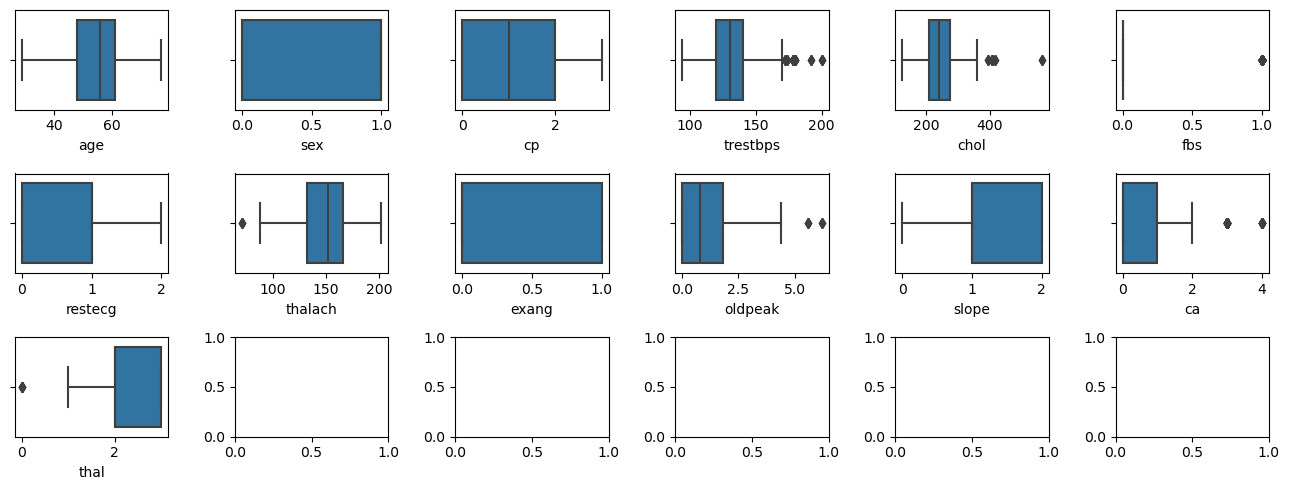

In [10]:
#Detecting outliers using Boxplot
def boxplots(df):
    cols = df.columns[:-1]
    n = (len(cols) - 1) // 6 + 1
    m = min(len(cols), 6)
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(13, 5))
    for idx, col in enumerate(cols):
        i = idx // m
        j = idx % m
        sns.boxplot(data=df, x=col, ax=axes[i][j])

    plt.tight_layout()
    plt.show()

boxplots(df)

In [11]:
#Fixing outliers
def outliers_removal(df, i):
    perc = np.percentile(df[i], [0, 25, 50, 75, 100])
    iqr = perc[3] - perc[1]
    _min = perc[1] - 1.5*iqr
    _max = perc[3] + 1.5*iqr
    df.loc[df[i] > _max, i] = _max
    df.loc[df[i] < _min, i] = _min
    return df

In [12]:
for i in df.columns[:-1]:
    df = outliers_removal(df, i)

C:\Users\B.RENUKA\AppData\Local\Temp\ipykernel_3080\4283771478.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '80.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] > _max, i] = _max
C:\Users\B.RENUKA\AppData\Local\Temp\ipykernel_3080\4283771478.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] > _max, i] = _max
C:\Users\B.RENUKA\AppData\Local\Temp\ipykernel_3080\4283771478.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] > _max, i] = _max
C:\Users\B.RENUKA\AppData\Local\Temp\ipykernel_3080\4283771478.

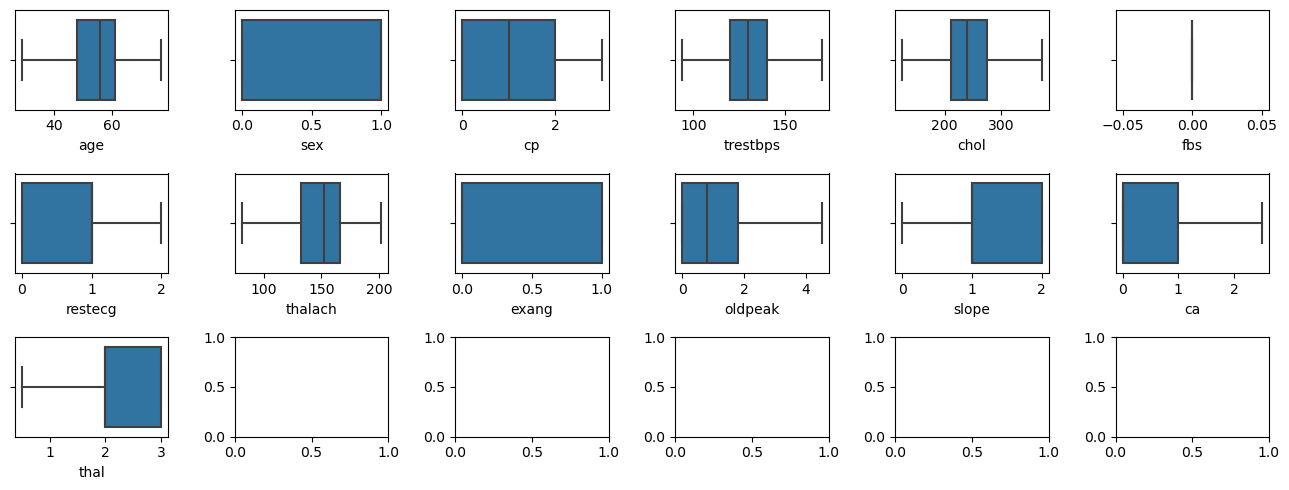

In [13]:
boxplots(df)

## Step4:Exploratory Data Analysis(EDA)

In [14]:
#descriptive statistics
df.describe().T    #T-transpose the result

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.260488,16.532208,94.0,120.0,130.0,140.0,170.0
chol,1025.0,244.981463,47.746162,126.0,211.0,240.0,275.0,371.0
fbs,1025.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.153171,22.881210,81.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.062244,1.141865,0.0,0.0,0.8,1.8,4.5


## Step 5:Correlation to find which Attribute contributes more to get the Target attribute-Heart disease

In [15]:
#Correlation with heatmap to interpret the relaton and multicolliniarity
s=df.select_dtypes(include="number").corr

In [16]:
print(type(s)) 

<class 'method'>


In [17]:
s = df.corr()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

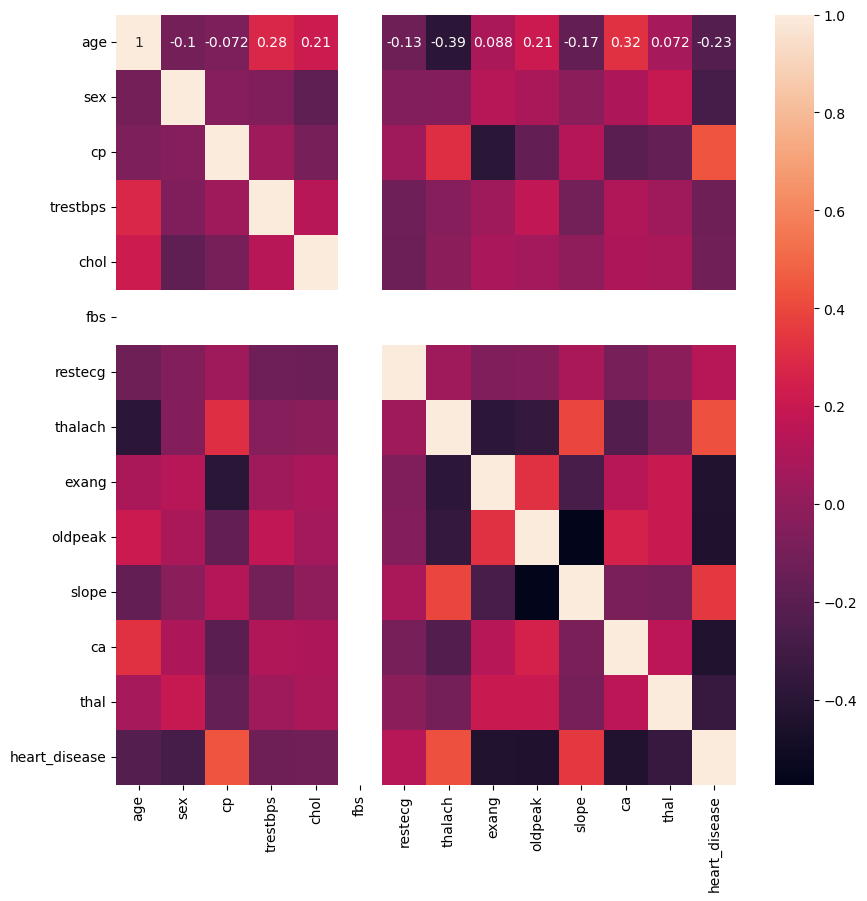

In [18]:
#To plot correlation in chart
plt.figure(figsize=(10,10))
sns.heatmap(s,annot=True)

In [22]:
from sklearn.preprocessing import LabelEncoder
#labelEncoder- encode categorical variables into numerical labels

# Read the dataset from a CSV file
dataset_path = r'C:\Users\B.RENUKA\Downloads\heart.csv'
dataset = pd.read_csv(dataset_path)

# List column names to choose from
print("Available columns:")
print(dataset.columns)

# Take input for target attribute
target_attribute = input("Enter the name of the target attribute: ")

# Label encode categorical variables
label_encoder = LabelEncoder()
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        dataset[column] = label_encoder.fit_transform(dataset[column])

# Compute Pearson correlation coefficient for each attribute with the target attribute
correlation_results = {}
max_correlation = 0
best_attribute = ''
for attribute in dataset.columns:
    if attribute != target_attribute:
        correlation = dataset[[attribute, target_attribute]].corr().iloc[0, 1]
        correlation_results[attribute] = correlation
        if abs(correlation) > max_correlation:  # Compare absolute value of correlation
            max_correlation = abs(correlation)
            best_attribute = attribute

# Print correlation coefficients
print("Pearson correlation coefficient between each attribute and '{}':".format(target_attribute))
for attribute, correlation in correlation_results.items():
    print("Attribute '{}': {}".format(attribute, correlation))

# Print the attribute with the highest correlation
print(f"\nThe attribute with the highest correlation with '{target_attribute}' is '{best_attribute}' with a correlation of {max_correlation:.4f}.")


Available columns:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heart_disease'],
      dtype='object')


Enter the name of the target attribute:  heart_disease


Pearson correlation coefficient between each attribute and 'heart_disease':
Attribute 'age': -0.22932355126761092
Attribute 'sex': -0.2795007572922624
Attribute 'cp': 0.434854250052737
Attribute 'trestbps': -0.13877173373730078
Attribute 'chol': -0.09996559423254128
Attribute 'fbs': -0.041163547464651236
Attribute 'restecg': 0.13446820873908916
Attribute 'thalach': 0.4228954964828723
Attribute 'exang': -0.438028550055846
Attribute 'oldpeak': -0.4384412701119449
Attribute 'slope': 0.3455117514359986
Attribute 'ca': -0.3820852890386709
Attribute 'thal': -0.3378381504571859

The attribute with the highest correlation with 'heart_disease' is 'oldpeak' with a correlation of 0.4384.


## Step 6: Finding F-Score of Every attribute

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 5 13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


F-Scores for each attribute:
        Attribute     F-Score
13  heart_disease         inf
9         oldpeak  249.567472
8           exang  242.883889
2              cp  238.558457
11             ca  235.154622
7         thalach  223.505350
10          slope  138.679393
12           thal  138.383161
1             sex   86.689707
0             age   56.785135
6         restecg   18.838205
3        trestbps   18.225078
4            chol   14.508536
5             fbs         NaN


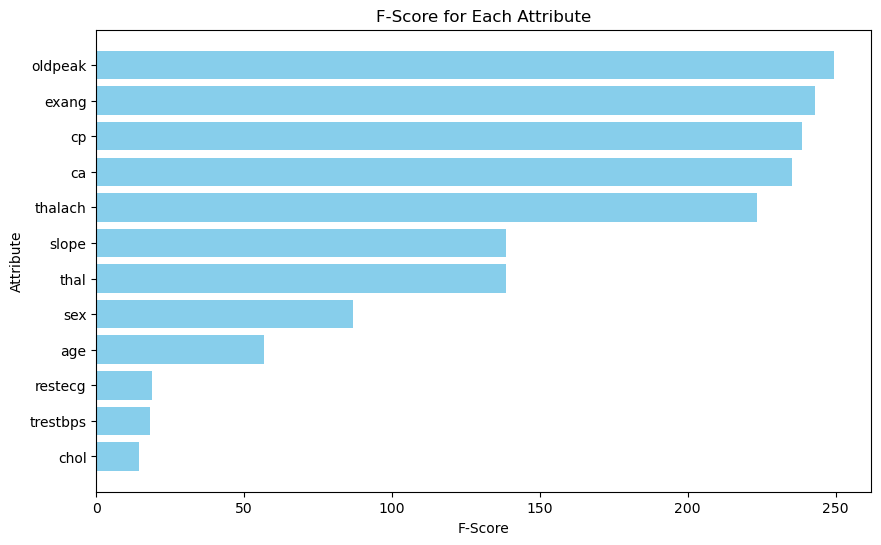

In [24]:
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt

def calculate_f_score(df, target_attribute):
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Calculate F-score for each numerical attribute
    f_scores, _ = f_classif(df[numerical_cols], df[target_attribute])
    
    # Create a DataFrame to store F-scores
    f_scores_df = pd.DataFrame({'Attribute': numerical_cols, 'F-Score': f_scores})
    
    # Sort the DataFrame by F-score in descending order
    f_scores_df = f_scores_df.sort_values(by='F-Score', ascending=False)
    
    return f_scores_df

def plot_f_score(f_scores_df):
    plt.figure(figsize=(10, 6))
    plt.barh(f_scores_df['Attribute'], f_scores_df['F-Score'], color='skyblue')
    plt.xlabel('F-Score')
    plt.ylabel('Attribute')
    plt.title('F-Score for Each Attribute')
    plt.gca().invert_yaxis()  # Invert y-axis to display attributes with highest F-score on top
    plt.show()

# Call the functions
f_scores_df = calculate_f_score(df, 'heart_disease')  # Replace 'target_attribute' with your actual target attribute
print("F-Scores for each attribute:")
print(f_scores_df)
plot_f_score(f_scores_df)


In [26]:
df['heart_disease'].fillna(df['heart_disease'].mean(), inplace=True)

## Step-7: Analyzing Modal with various performance Metrics-Accuracy,Precision,Recall

### Modals Used are KNN, Naive bayes, Adaboost , Neural network, SVM, Logistic Regression

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: K-Nearest Neighbors
Accuracy: 0.7317073170731707
Confusion Matrix:
 [[74 28]
 [27 76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



Model: Naive Bayes
Accuracy: 0.8
Confusion Matrix:
 [[72 30]
 [11 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



Model: AdaBoost
Accuracy: 0.8926829268292683
Confusion Matrix:
 [[94  8]
 [14 89]]
Classification Report:
               precisio

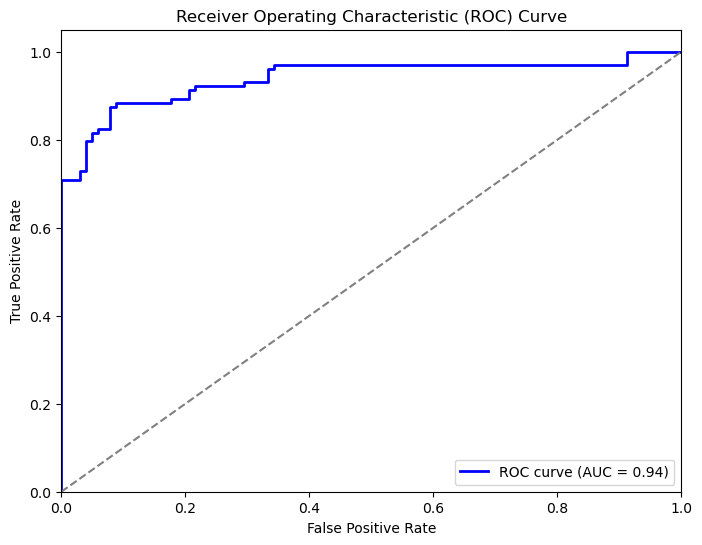

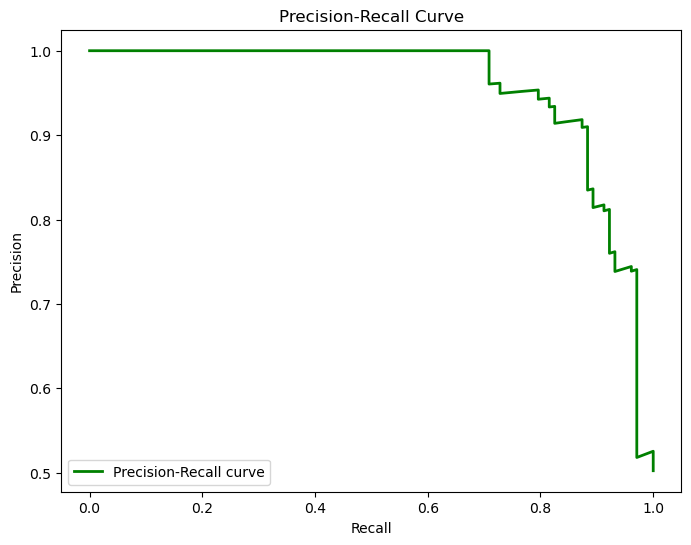

In [3]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import pandas as pd

# Suppress warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Read the dataset from a CSV file
dataset_path = r'C:\Users\B.RENUKA\Downloads\heart.csv'
df = pd.read_csv(dataset_path)

# Split the data into features (X) and target (y)
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Neural Network': MLPClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Confusion Matrix': conf_matrix, 'Classification Report': class_report}

# Print results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']}")
    print("Confusion Matrix:\n", result['Confusion Matrix'])
    print("Classification Report:\n", result['Classification Report'])
    print("\n")

# Find the best model based on accuracy
best_model_name = max(results, key=lambda x: results[x]['Accuracy'])
best_model_accuracy = results[best_model_name]['Accuracy']

# Print the best model
print(f"The best model is '{best_model_name}' with an accuracy of {best_model_accuracy:.4f}.")

# Get the predictions and probabilities for the best model
y_pred_best = models[best_model_name].predict(X_test)
y_probs_best = models[best_model_name].predict_proba(X_test)

# Plot ROC curve
if y_probs_best.shape[1] == 1:  # Binary classification
    # For binary classification, use the probabilities for the positive class
    y_probs_positive = y_probs_best[:, 0]
    fpr, tpr, _ = roc_curve(y_test, y_probs_positive)
else:  # Multiclass classification
    # For multiclass classification, use the probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_probs_best[:, 1])

roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs_best[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


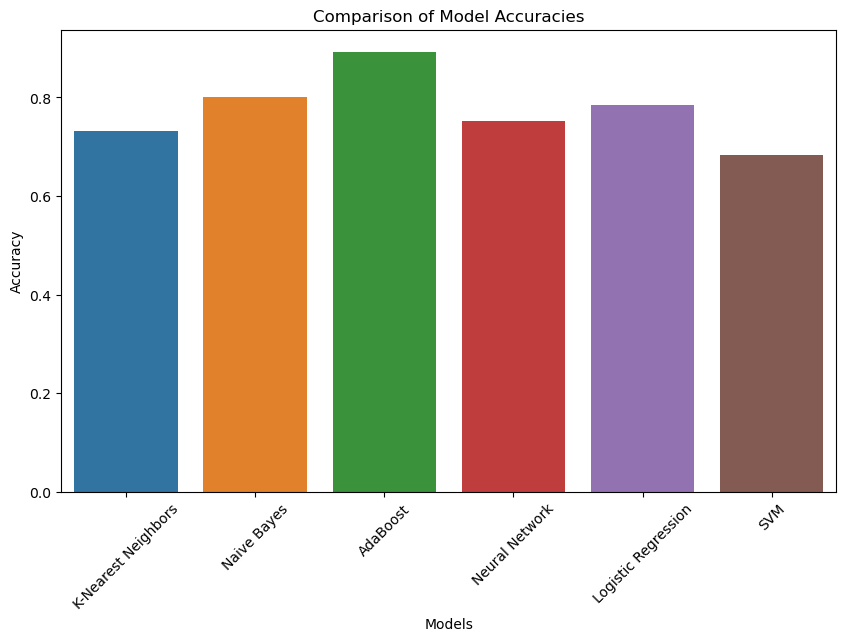

In [5]:
# Train and evaluate each model
import seaborn as sns
model_accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy

# Creating the comparison bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()


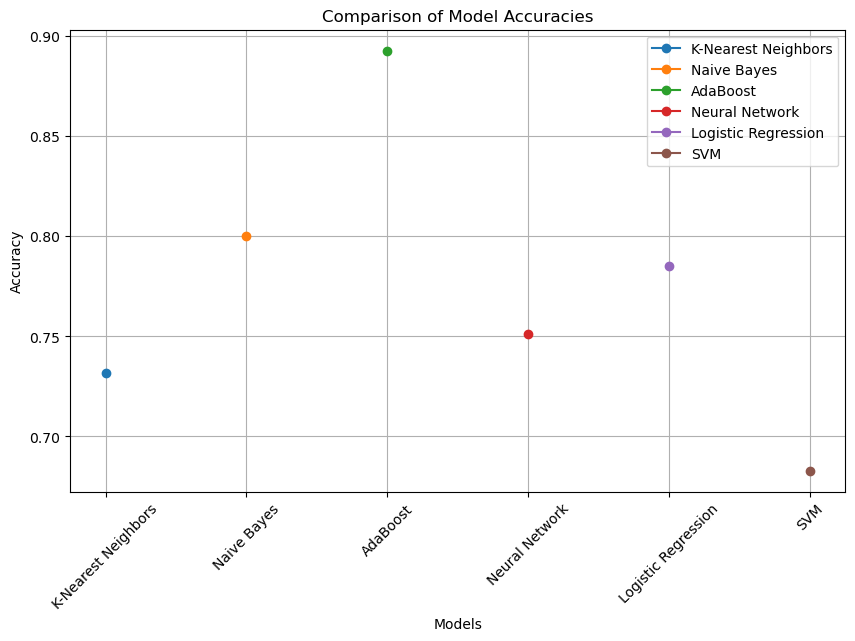

In [6]:
#Line plot
plt.figure(figsize=(10, 6))
for model, acc in model_accuracies.items():
    plt.plot([model], [acc], marker='o', label=model)

plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
